# Project: Uber Requests Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

*This is a dataset that contains records of Uber requests, their pickup points, whether the trip was completed or not, and timestamps of the request and the drop (if available).*

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

<a id='wrangling'></a>
## Data Wrangling

In [347]:
df= pd.read_csv(r'Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [348]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [350]:
#dropping the requestID and the driverID columns
df.drop(['Request id', 'Driver id'], axis=1, inplace=True)

In [351]:
df.head(10)

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,Airport,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,Airport,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,Airport,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,City,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,City,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [352]:
#Converting to Datetime objects while accounting for different formats
df['Request timestamp']=pd.to_datetime(df['Request timestamp'], format="%d/%m/%Y %H:%M", errors='coerce').fillna(pd.to_datetime(df['Request timestamp'], format="%d-%m-%Y %H:%M:%S", errors='coerce'))

In [353]:
df['Request timestamp'].isnull().sum()

0

In [354]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'], format="%d/%m/%Y %H:%M", errors='coerce').fillna(pd.to_datetime(df['Drop timestamp'], format="%d-%m-%Y %H:%M:%S", errors='coerce'))

In [355]:
df['Drop timestamp'].isnull().sum()

3914

In [356]:
df.head()

,Pickup point,Status,Request timestamp,Drop timestamp
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [357]:
df['requestday']=df['Request timestamp'].dt.day_name()
df['requesthour']=df['Request timestamp'].dt.hour

In [358]:
df.head(2)

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17


In [359]:
#calculating trip time in minutes
df['triptime']=df['Drop timestamp']-df['Request timestamp']
df['triptime']=df['triptime'].dt.total_seconds()//60
#df.triptime=df.triptime.fillna(0)
#df['triptime']=df['triptime'].astype(int)

In [360]:
df.head(2)

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour,triptime
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,69.0
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,50.0


In [361]:
df2=df.copy(deep=True)
df2.head(2)

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour,triptime
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,69.0
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,50.0


In [362]:
df2['pickup_num']=df2['Pickup point'].map(dict(Airport=1, City=2))
df2['status_num']=df2['Status'].map({'Trip Completed':1, 'Cancelled':2, 'No Cars Available':3})
df2['requestday_num']=df2['Request timestamp'].dt.weekday

In [363]:
df2.head()

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour,triptime,pickup_num,status_num,requestday_num
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,69.0,1,1,0
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,50.0,1,1,0
2,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Tuesday,9,41.0,2,1,1
3,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Tuesday,21,55.0,1,1,1
4,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,52.0,2,1,2


In [364]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Status             6745 non-null   object        
 2   Request timestamp  6745 non-null   datetime64[ns]
 3   Drop timestamp     2831 non-null   datetime64[ns]
 4   requestday         6745 non-null   object        
 5   requesthour        6745 non-null   int64         
 6   triptime           2831 non-null   float64       
 7   pickup_num         6745 non-null   int64         
 8   status_num         6745 non-null   int64         
 9   requestday_num     6745 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 527.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis

In [365]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

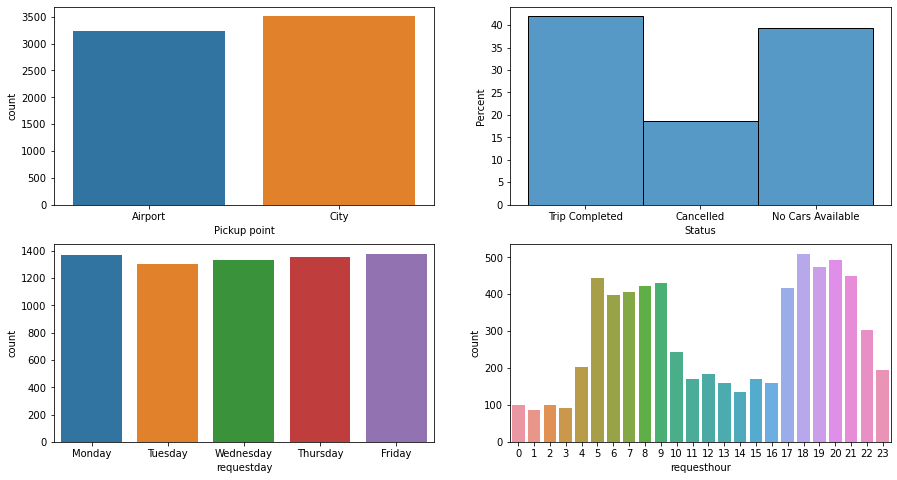

In [366]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
sns.countplot(data=df, x='Pickup point')
plt.subplot(2,2,2)
sns.histplot(x='Status', data=df, stat='percent')
plt.subplot(2,2,3)
sns.countplot(x='requestday', data=df)
plt.subplot(2,2,4)
sns.countplot(x='requesthour', data=df);

- There are slighlty more trips that are requested from the city than the Airport
- About 40% of requests get completed, at 40% of requests there are no cars available, and about 20% of the time, the trip gets cancelled
- 6 PM is the time of the day with the most requests. The period from 5 PM to 9 PM is the one with the highest number of requests, after that is the period from 5 AM to 9 AM

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Status             6745 non-null   object        
 2   Request timestamp  6745 non-null   datetime64[ns]
 3   Drop timestamp     2831 non-null   datetime64[ns]
 4   requestday         6745 non-null   object        
 5   requesthour        6745 non-null   int64         
 6   triptime           2831 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 369.0+ KB


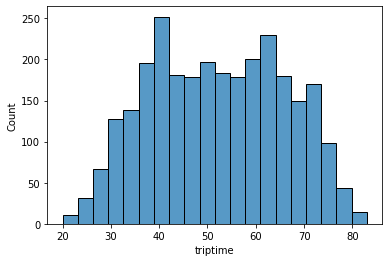

In [368]:
sns.histplot(data=df[~df['triptime'].isnull()], x='triptime');

As far as the trips that were completed, the time the trip takes is close-to-normally distributed

### Multivariate Analysis

In [369]:
df.head(2)

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour,triptime
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,69.0
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,50.0


In [370]:
df2.head(2)

,Pickup point,Status,Request timestamp,Drop timestamp,requestday,requesthour,triptime,pickup_num,status_num,requestday_num
0,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Monday,11,69.0,1,1,0
1,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Monday,17,50.0,1,1,0


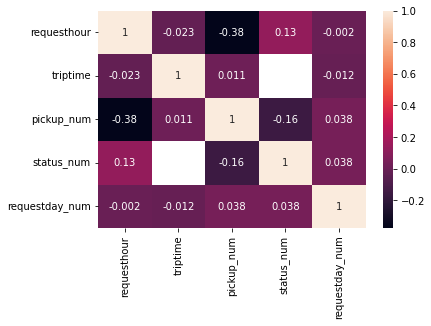

In [371]:
sns.heatmap(df2.corr(), annot=True);

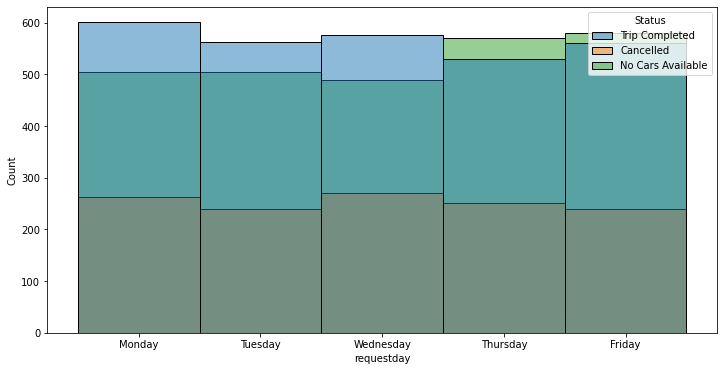

In [372]:
plt.figure(figsize=[12,6])
sns.histplot(x='requestday', hue='Status', data=df);

On Thursdays and Fridays there are, generally, less cars available

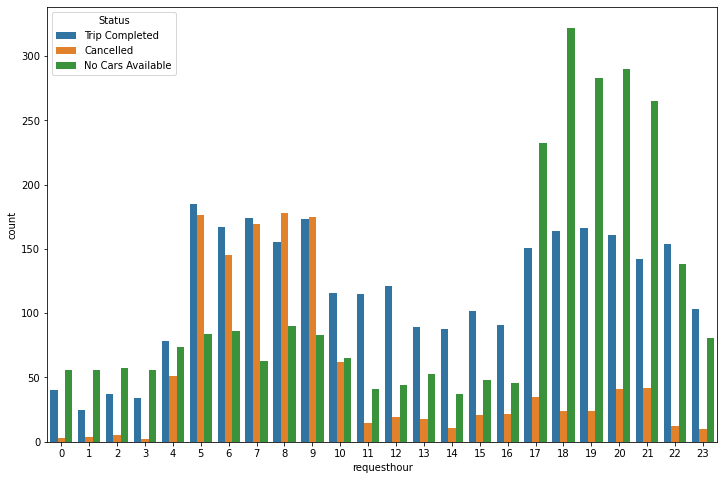

In [373]:
plt.figure(figsize=[12,8])
sns.countplot(x='requesthour', hue='Status', data=df);

Car availability is affected by the time of the request, as there are less cars available in the evening (from around 5 PM to 9 PM 

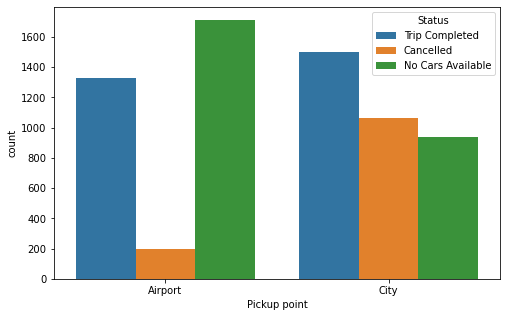

In [374]:
plt.figure(figsize=[8,5])
sns.countplot(x='Pickup point', hue='Status', data=df);

There are many more trips that get cancelled when requested from the City, while there tend to be fewer cars available when requested at the Airport

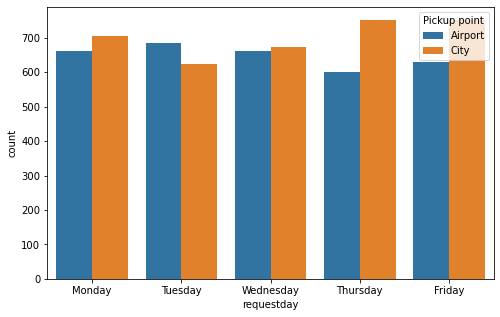

In [375]:
plt.figure(figsize=[8,5])
sns.countplot(x='requestday', hue='Pickup point', data=df);

Only on Tuesdays Airport requests are more than City requests

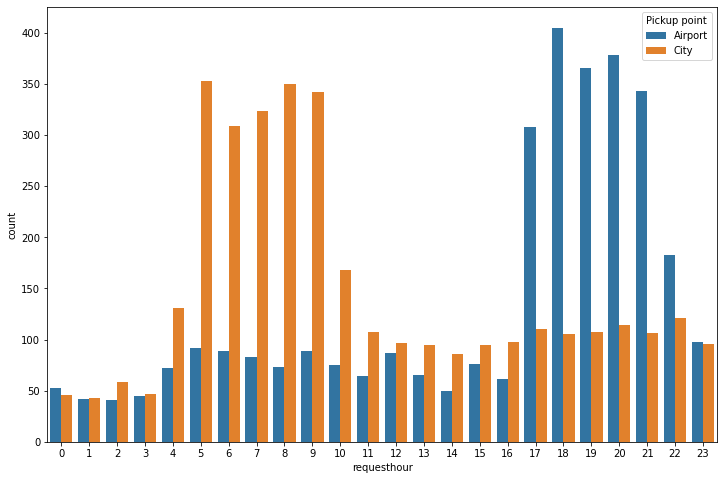

In [376]:
plt.figure(figsize=[12,8])
sns.countplot(x='requesthour', hue='Pickup point', data=df);

City requests are more during the day, while Airport requests tend to be more from 5 PM to 12 AM

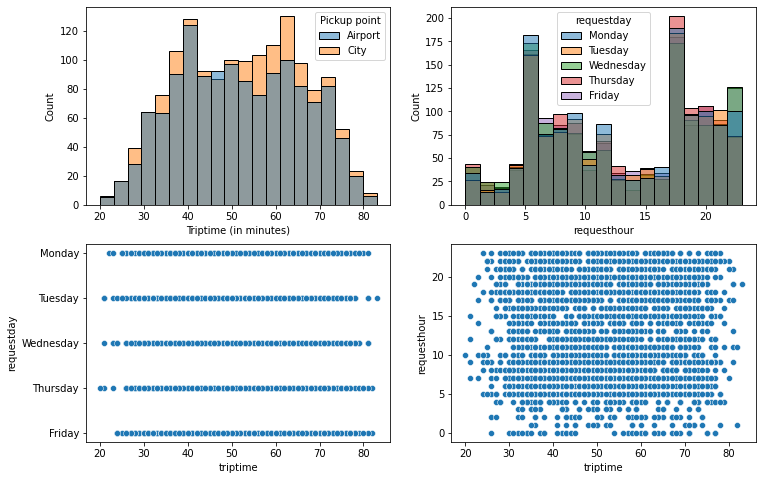

In [377]:
plt.figure(figsize=[12,8])
plt.subplot (2,2, 1)
sns.histplot(x='triptime', hue='Pickup point', data=df[df['Status'] == 'Trip Completed'])
plt.xlabel('Triptime (in minutes)')
plt.subplot (2,2, 2)
sns.histplot(x='requesthour', hue='requestday', data=df)
plt.subplot (2,2, 3)
sns.scatterplot(x='triptime', y='requestday', data=df)
plt.subplot (2,2, 4)
sns.scatterplot(x='triptime', y='requesthour', data=df);

<a id='conclusions'></a>
## Conclusions

- **There are slighlty more trips that are requested from the city than the Airport.** There are more people in the city than people coming through the Airport

- **About 40% of requests get completed, at 40% of requests there are no cars available, and about 20% of the time, the trip gets cancelled.** So in the timeframe that this data was recorded in, there was a relatively high percentage of cancellation (1 in every 5 trips gets cancelled) and a very high percentage of Car unavailability.

- **6 PM is the time of the day with the most requests. The period from 5 PM to 9 PM is the one with the highest number of requests, after that is the period from 5 AM to 9 AM.** This is most likely due to the fact that people go out more at night, and that a lot of arrivals at the airport are also at night.

- **As far as the trips that were completed, the time the trip takes is close-to-normally distributed,** which makes sense considering that the sample is random.

- **On Thursdays and Fridays there are, generally, less cars available.** It depends on the location of the trips, but that might be due to the fact that more people go out on the weekends.

- **Car availability is affected by the time of the request, as there are less cars available in the evening (from around 5 PM to 9 PM.** That is due to the fact that this time of the day a lot more people request trips, so it makes sense that there will be fewer cars available at that time.

- **There are many more trips that get cancelled when requested from the City, while there tend to be fewer cars available when requested at the Airport.** That might be due to the fact that less people are willing to cancel their requests at the Airport, since they're probably in a hurry, while there are fewer cars available because Airports tend to be a bit away from the city, and since fewer people request from the Airport, fewer Uber drivers will be there.

- **Only on Tuesdays Airport requests are more than City requests.** This finding needs further investigation, but it seems that more people arrive at that Airport on tuesdays than any other day.

- **City requests are more during the day, while Airport requests tend to be more from 5 PM to 12 AM.** It seems that more people arrive at night at the Airport.

#### Limitations
- The data was recorded in a specific timeframe (certain days of the week), so a full time analysis couldn't be done.
- The locations of the Uber requests aren't available